## Cotizaciones de las principales empresas en pandemia
_Mauricio Alvarado_

Este notebook tiene la finalidad de explorar brevemente las librerías `yahoo finance`, `pandas` y `matplotlib`. Se realizará un proceso exploratorio de las cotizaciones de las empresas desde los los años 2019 y 2022, al igual que sus precios históricos. Se puede consultar más sobre la documentación de `yfinance` en: https://pypi.org/project/yfinance/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

Se define, mediante _dictionaries_, cuales son las empresas por analizar. Se debe colocar el _Ticker_ con el que cotizan en la bolsa de valores como _key_ y el nombre de la empresa como _value_

In [2]:
companies = {"AMZN": "Amazon",
             "AAPL":"Apple",
             "KO":"Coca-Cola",
             "FB":"Facebook",
             "MSFT":"Microsoft",
             "NFLX":"Netflix",
             "PYPL":"PayPal",
             "SHOP":"Shopify",
             "SPOT":"Spotify",
             "TCEHY":"Tencent",
             "TSLA":"Tesla",
             "ZM":"Zoom"}

Como un proceso adicional, se puede separar los _keys_ y los _values_ en dos listas diferentes. Estas servirán posteriormente para la importación de los datos, el renombramiento de estos y el presentarlos gráficamente

In [3]:
companies_keys = list(companies.keys())
companies_name = list(companies.values())

Previo a la importación de todos los datos, se debe crear el entorno en el que estarán los precios de las cotizaciones. Se crea un `DataFrame` vacío que luego va a contener el precio de cierre de las acciones las empresas previamente definidas

In [4]:
data = pd.DataFrame()

Mediante un loop se importará los precios de las acciones de todas las empresas pertenecientes a la variable _companies_. La importación se realiza mediante el código único de cotización de cada empresa o _Ticker_, por lo que es de gran utilidad contar con la lista llamada _companies_keys_. Cada una de ellas se importará a la variable _data_.

El comando `concat` colocará las fechas y precio de cierre de las acciones de Amazon (la primera en importarse). Luego el comando `merge` vinculará cada fecha de cotización y asignará cada precio con cada las fecha que ya forme parte de la data. Es importante notar que se tomará de referencia las fechas de Amazon desde su primer día de cotización, por lo que habrá data vacía en algunas empresas que aún no cotizaban

In [5]:
# Loop para importar todas las acciones que forman parte de la lista companies_keys
for key in companies_keys:
    company_data = yf.Ticker(key)
    company_data = company_data.history(period="max")
    company_data.reset_index(inplace=True)
    
    # Se crea una variable con el precio de cierre de las acciones, y se le asigna el nombre de su Ticker
    company_data[key] = company_data.Close
    
    #Comenzamos con la unión de cada una de las empresas
    if data.empty is True:
        data = pd.concat([data, company_data[["Date", key]]])
    else:
        data = pd.merge(data, company_data[["Date", key]], how="left")

Tras la importación, se puede colocar la variable `Date` como el índice del DataFrame `data`

In [6]:
data.set_index("Date", inplace=True)

Usando el método `head`, se puede visualizar las primeras cinco filas. Como se aprecia en el resultado, existen algunas empresas que aún no cotizaban en los años 1997, por lo que cuentan con _missing values_

In [7]:
data.head()

,AMZN,AAPL,KO,FB,MSFT,NFLX,PYPL,SHOP,SPOT,TCEHY,TSLA,ZM
Date,,,,,,,,,,,,
1997-05-15,1.958333,0.135505,18.000774,NaN,9.202441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,1.729167,0.131688,17.735573,NaN,9.069849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,1.708333,0.129780,18.033926,NaN,9.045299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,1.635417,0.131688,18.133377,NaN,9.359577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,1.427083,0.128826,17.868170,NaN,9.457786,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cada empresa tiene como nombre el Ticker. Para facilitar el análisis, se puede reemplazar el código por el nombre comercial de cada empresa. Para ello, se reemplaza cada _key_ con su nombre asignado al inicio con el diccionario _companies_

In [8]:
data = data.rename(companies, axis = 1)

Finalmente, se puede extraer la información entre los años 2000 y 2022 para crear la primera visualización de los precios de manera conjunta

In [9]:
data = data[data.index >= '2000-01-01']

La data quedará como la siguiente:

In [10]:
data.head()

,Amazon,Apple,Coca-Cola,Facebook,Microsoft,Netflix,PayPal,Shopify,Spotify,Tencent,Tesla,Zoom
Date,,,,,,,,,,,,
2000-01-03,89.3750,0.854541,15.335268,NaN,36.632969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,81.9375,0.782494,15.352265,NaN,35.395504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,69.7500,0.793945,15.488277,NaN,35.768715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,65.5625,0.725238,15.505284,NaN,34.570522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,69.5625,0.759592,16.525366,NaN,35.022289,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Proceso exploratorio

Comenzando con la exploración y visualización de los datos, la librería `matplotlib` es muy útil, tanto si se desea presentar gráficos con todas las variables, como de manera separada. En primer lugar, se presentará un gráfico que incluye, de manera conjunta, las cotizaciones de todas las empresas entre los años 2000 al 2022

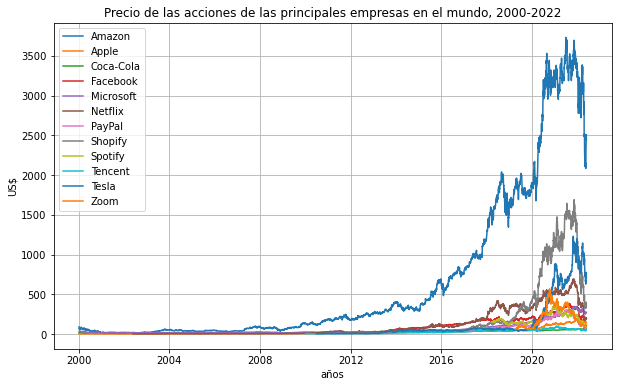

In [11]:
plt.figure(figsize=(10,6))
plt.title("Precio de las acciones de las principales empresas en el mundo, 2000-2022")

# Iteración para graficar todas las variables
for company in companies_name:
    plt.plot(data.index, data[company], label = company)

plt.xlabel("años")
plt.ylabel("US$")

plt.grid(True)
plt.legend()

plt.show()

Para estudiar el desempeño de estas empresas durante el periodo de pandemia, se debe reducir del horizonte de análisis tomando como fecha de inicio octubre del 2019 hasta la información más reciente (y que continúa actualizándose día a día)

In [12]:
data_pandemia = data[data.index >= "2019-10-01"]

In [13]:
data_pandemia.tail()

,Amazon,Apple,Coca-Cola,Facebook,Microsoft,Netflix,PayPal,Shopify,Spotify,Tencent,Tesla,Zoom
Date,,,,,,,,,,,,
2022-05-27,2302.929932,149.639999,64.680000,195.130005,273.239990,195.190002,85.209999,369.040009,112.970001,43.860001,759.630005,110.419998
2022-05-31,2404.189941,148.839996,63.380001,193.639999,271.869995,197.440002,85.209999,375.119995,112.769997,45.540001,758.260010,107.449997
2022-06-01,2433.679932,148.710007,63.070000,188.639999,272.420013,192.910004,82.480003,361.529999,110.000000,45.310001,740.369995,107.650002
2022-06-02,2510.219971,151.210007,63.730000,198.860001,274.579987,205.089996,88.320000,398.869995,116.500000,46.810001,775.000000,112.239998
2022-06-03,2447.000000,145.380005,62.970001,190.779999,270.019989,198.979996,86.529999,353.660004,112.230003,45.990002,703.549988,109.419998


Para presentar cada precio de manera individual, pero dentro de una figura, se usará los _subplot_ de _matplotlib_. No obstante, previo a realizarlo, es importante recalcar que el uso del método _enumerate_ brindará la posición de cada empresa dentro de la lista _companies_name_. No obstante, la enumeración de cada subgráfico debería comenzar con la posición "1" para implementarlo en los _subplots_, pero comienza por la posición "0". Debido a este problema, es necesario sumar uno a cada una de las posiciones en el momento de referenciarlos en el _loop_.

Con la finalidad de ejemplificar este punto, a continuación se presentará la lista _companies_name_ y la enumeración por defecto asignado por _Python_

In [14]:
list(enumerate(companies_name))

[(0, 'Amazon'),
 (1, 'Apple'),
 (2, 'Coca-Cola'),
 (3, 'Facebook'),
 (4, 'Microsoft'),
 (5, 'Netflix'),
 (6, 'PayPal'),
 (7, 'Shopify'),
 (8, 'Spotify'),
 (9, 'Tencent'),
 (10, 'Tesla'),
 (11, 'Zoom')]

Con lo mencionado previamente, se va a crear una figura general, la cual contará con subfiguras en su interior. El entorno a crearse tendrá una dimensión de (4,3), por lo que únicamente podrán entrar doce empresas (en caso de requerir un entorno mayor, se puede modificar las dimensiones). Cada subgráfica será llamada con un _loop_ y tendrá el mismo formato en cada uno de los casos. El orden asignado para cada subgráfica será referenciada mediante la posición que cuente en la lista _companies_name_, pero adicionandole un "uno", por las razones ya previamente explicadas.

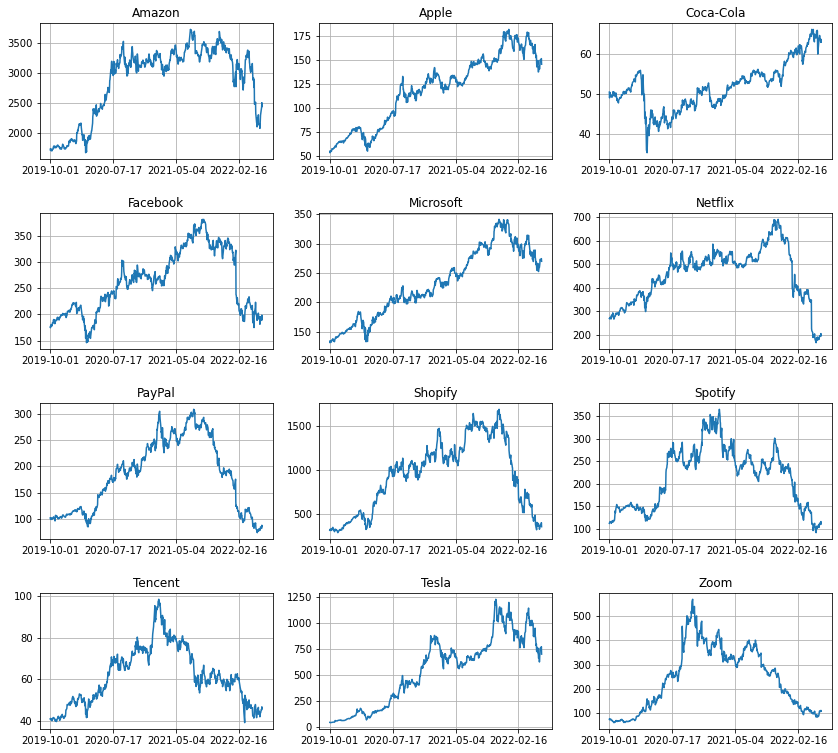

In [15]:
plt.figure(figsize=(20,14))

# Iteración para crear diferentes subgráficas
for i in enumerate(companies_name):
    plt.subplot(4, 3, i[0]+1)
    plt.plot(data_pandemia.index, data_pandemia[i[1]])
    plt.title(i[1])
    plt.grid(True)
    plt.xticks(data_pandemia.index[::200])
    
# Moficiando las dimensiones entre cada gráficas
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

Además, es relevante realizar un análisis en términos de variaciones porcentuales. Para ello, se realiza una copia a la variable _data_pandemia_, usada para realizar los gráficos ya mostrados. Esto se realizará con el método `copy`

In [16]:
data_groth = data_pandemia.copy()

La nueva variable creada es _data_groth_. Esta debe contar con las variaciones porcentuales, por lo que a cada una de las columnas se le reemplazará por sus tasas de crecimientos con la de un periodo previo. Una de las formas para hallarla es mediante la diferencia entre los logaritmos de un periodo con su rezago. El rezago de una variable se puede referenciar mediante el método `shift(x)`, donde "x" es la cantidad de rezagos

In [17]:
for stock in companies_name:
    data_groth[stock] = np.log(data_groth[stock]) - np.log(data_groth[stock]).shift(1)

In [18]:
data_groth.head()

,Amazon,Apple,Coca-Cola,Facebook,Microsoft,Netflix,PayPal,Shopify,Spotify,Tencent,Tesla,Zoom
Date,,,,,,,,,,,,
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-02,-0.013002,-0.025387,-0.029149,-0.006906,-0.017813,-0.005766,-0.027689,-0.009173,0.012190,-0.009447,-0.006396,-0.026194
2019-10-03,0.006510,0.008459,0.014216,0.027009,0.012033,0.000448,0.012951,0.047845,0.008045,0.014257,-0.042429,0.039559
2019-10-04,0.008793,0.027646,0.012918,0.005947,0.013411,0.017156,0.017271,0.004994,0.013839,-0.006258,-0.006890,-0.003912
2019-10-07,-0.004026,0.000220,-0.012361,-0.004276,-0.007266,0.006103,-0.011448,-0.002693,-0.004822,-0.010192,0.026816,0.005993


Con la data en términos de tasas de crecimiento se puede realizar, nuevamente, una figura que cuenta con subfiguras de cada una de las empresas. El código es similar al previamente mostrado. Con estas gráficas se puede observar la volatilidad de cada uno de los precios durante el horizonte temporal de estudio

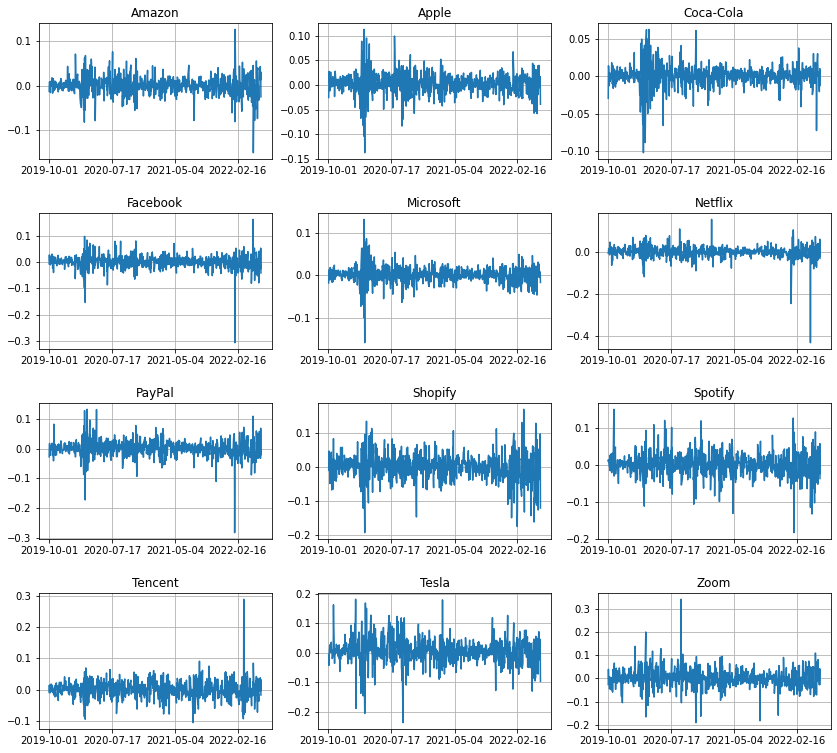

In [19]:
plt.figure(figsize=(20,14))

# Iteración para crear diferentes subgráficas
for i in enumerate(companies_name):
    plt.subplot(4, 3, i[0]+1)
    plt.plot(data_groth.index, data_groth[i[1]])
    plt.title(i[1])
    plt.grid(True)
    plt.xticks(data_groth.index[::200])
    
# Modificando las dimensiones entre cada gráficas
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

Finalmente, se puede crear un `heatmap` de la matriz de correlaciones. Esto nos permitirá observar si existe correlaciones en los movimientos de algunas acciones de las empresas. Se esperaría que aquellas empresas que están en el mismo rubro o industria deberían tener una correlación alta, y por el contrario, las que no estén en la misma industria, una relación quizás un poco más bajo. La matriz de correlación de definirá de la siguiente manera:

In [20]:
data_pandemia_corr = data_pandemia.corr()

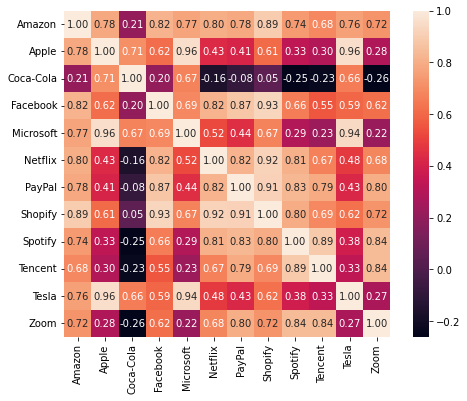

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data_pandemia_corr, cbar = True, annot = True, square = True,
            fmt = ".2f", annot_kws = {"size":10}, vmax = 1)
plt.show()

Como era de esperarse, las empresas del sector tecnológico cuentan con alta correlación durante la pandemia. Estas empresas han mantenido un gran crecimiento a diferencia de la empresa _CocaCola_ que es de consumo masivo y requiere de cadenas de suministros, los cuales fueron parcialmente paralizados en el 2020